In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
df=pd.read_csv('/content/sms_spam.csv')

In [224]:
df.head(2)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [225]:
df.shape

(5574, 2)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5574 non-null   object
 1   text    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [227]:
df['type'].value_counts()

,count
type,
ham,4827
spam,747


In [228]:
df['type']=df['type'].map({'spam':0,'ham':1})

In [229]:
df['type'][0]

np.int64(1)

In [230]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def stop_words(text):
  result=""
  for word in nltk.word_tokenize(text):
    if word not in stopwords.words('english'):
      result+=word+" "

  return result.strip()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [231]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [232]:
import string
import nltk
nltk.download('punkt')
def remove_punct_for_all(text):
  return text.translate(str.maketrans('','',string.punctuation))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [233]:
import re

def remove_html(text):
    return re.sub(r'<.*?>', '', text)

In [234]:
URL=re.compile(r'https?://\S+|www\.\S+')
def URLremove(text):
  return URL.sub(r'',text)

In [235]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmas)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [236]:
def lower(text):
    return text.lower()


In [237]:
def apply_all(text):
  text=URLremove(text)
  text=remove_punct_for_all(text)
  text=remove_html(text)
  text=stop_words(text)
  text=lower(text)
  text=lemmatize_text(text)
  return text

df['text']=df['text'].apply(apply_all)

In [238]:
df['text'][0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [239]:
df.isnull().sum()

,0
type,0
text,0


In [240]:
df.shape

(5574, 2)

In [241]:
df['text'][55]

'do know mallika sherawat yesterday find lturlgt'

In [242]:
df.sample()

,type,text
2401,1,hi this roger cl how


In [243]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
x=tf.fit_transform(df['text'])


In [244]:
y=df['type']

In [245]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [246]:
from sklearn.linear_model import LogisticRegression

In [247]:
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [248]:
ypred=model.predict(x_test)

In [249]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.95695067264574
[[117  44]
 [  4 950]]
              precision    recall  f1-score   support

           0       0.97      0.73      0.83       161
           1       0.96      1.00      0.98       954

    accuracy                           0.96      1115
   macro avg       0.96      0.86      0.90      1115
weighted avg       0.96      0.96      0.95      1115



In [250]:
ypred=model.predict(x_train)
print(accuracy_score(y_train,ypred))


0.966808701502579


In [251]:
from sklearn.metrics import f1_score
model=LogisticRegression(class_weight='balanced',max_iter=300)
model.fit(x_train,y_train)
ypred=model.predict(x_test)

print(f1_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.9884575026232949
[[151  10]
 [ 12 942]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       161
           1       0.99      0.99      0.99       954

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [252]:
ypred=model.predict(x_train)
print(accuracy_score(y_train,ypred))


0.9919264409060328


In [253]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,Embedding,SimpleRNN,GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [254]:
max_words=3500
max_len=100
tk=Tokenizer(max_words,oov_token='<oov>')
tk.fit_on_texts(df['text'])
sequence = tk.texts_to_sequences(df['text'])
X=pad_sequences(sequence,maxlen=max_len)


In [282]:
def build_lstm():
  model=Sequential([
      Embedding(max_words,128,input_length=max_len),
      LSTM(128,return_sequences=False),

      Dense(32,activation='relu'),
      Dropout(0.5),
      Dense(32,activation='relu'),
      Dropout(0.5),
      Dense(1,activation='sigmoid')

  ])
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

In [283]:
from sklearn.model_selection import train_test_split
X=np.array(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=build_lstm()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_loss",    
    patience=3,           
    restore_best_weights=True 
)
history=model.fit(
    x_train, y_train,
    validation_data=(X, y),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]  #
)




Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8627 - loss: 0.3629 - val_accuracy: 0.9876 - val_loss: 0.0448
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9900 - loss: 0.0559 - val_accuracy: 0.9950 - val_loss: 0.0208
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9948 - loss: 0.0273 - val_accuracy: 0.9957 - val_loss: 0.0161
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9951 - loss: 0.0193 - val_accuracy: 0.9970 - val_loss: 0.0138
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9972 - loss: 0.0196 - val_accuracy: 0.9970 - val_loss: 0.0146
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9987 - loss: 0.0061 - val_accuracy: 0.9821 - val_loss: 0.0580
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9962 - loss: 0.0140 - val_accuracy: 0.9968 - val_loss: 0.0176


In [267]:
X.shape

(5574, 100)

In [268]:
y.shape

(5574,)

In [269]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ypred=model.predict(x_test)
ypred=np.where(ypred>0.5,1,0)
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
0.9901345291479821
[[153   8]
 [  3 951]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       161
           1       0.99      1.00      0.99       954

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [261]:
df['type'].value_counts()

,count
type,
1,4827
0,747


In [262]:
df.shape

(5574, 2)

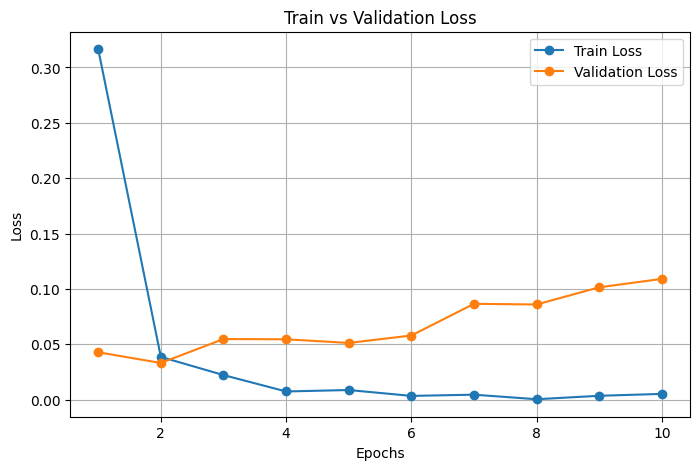

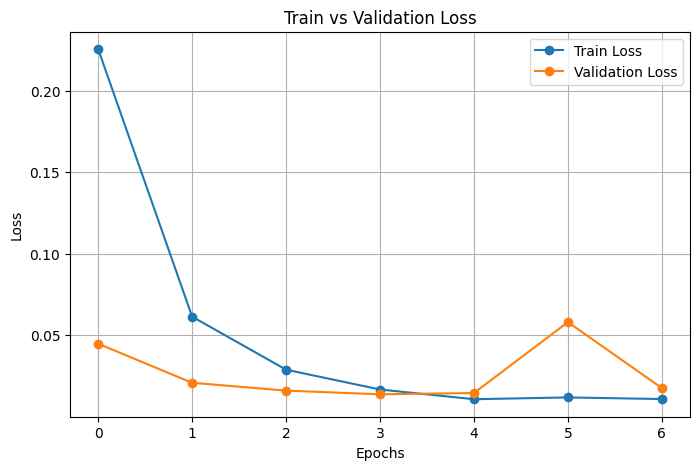